# LAB 5

## The Sloan Digital Sky Survey which offers public data of space observations.
## This dataset consists of 10,000 records of observations of space taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sns
color = sns.color_palette()
from sklearn import datasets, linear_model
import itertools

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

In [17]:
#plt.rcParams['figure.figsize'] = (15.0, 15.0)

In [6]:
data = pd.read_csv("D:\Downloads\sloan-digital-sky-survey\Skyserver.csv", parse_dates = [0], error_bad_lines=False)

# Overview of Data
## Labels
#### So what exactly are stars, galaxies, and quasars? Had you asked me prior to starting this project, I would’ve not been able to answer (shame on me). Fortunately, Faraz’s notebook succinctly summarises what they are:

##### A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.
##### A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.
##### A QUASAR, also known as quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. The most powerful quasars have luminosities exceeding 1041 watts, thousands of times greater than an ordinary large galaxy such as the Milky Way.

## Features
### A summary of the more important features are:
#### - ra, dec — right ascension and declination respectively
#### - u, g, r, i, z — filter bands (a.k.a. photometric system or astronomical magnitudes)
#### - run, rerun, camcol, field — descriptors of fields (i.e. 2048 x 1489 pixels) within image
#### - redshift — increase in wavelength due to motion of astronomical object
#### - plate — plate number
#### - mjd — modified Julian date of observation
#### - fiberid — optic fiber ID

#### "U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

In [7]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.23765E+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.23765E+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.23765E+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.23765E+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.23765E+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [8]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null object
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [10]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [11]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [12]:
df = data.copy()

In [13]:
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'plate', 'mjd', 'fiberid', 'field'], axis=1, inplace=True)

In [14]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


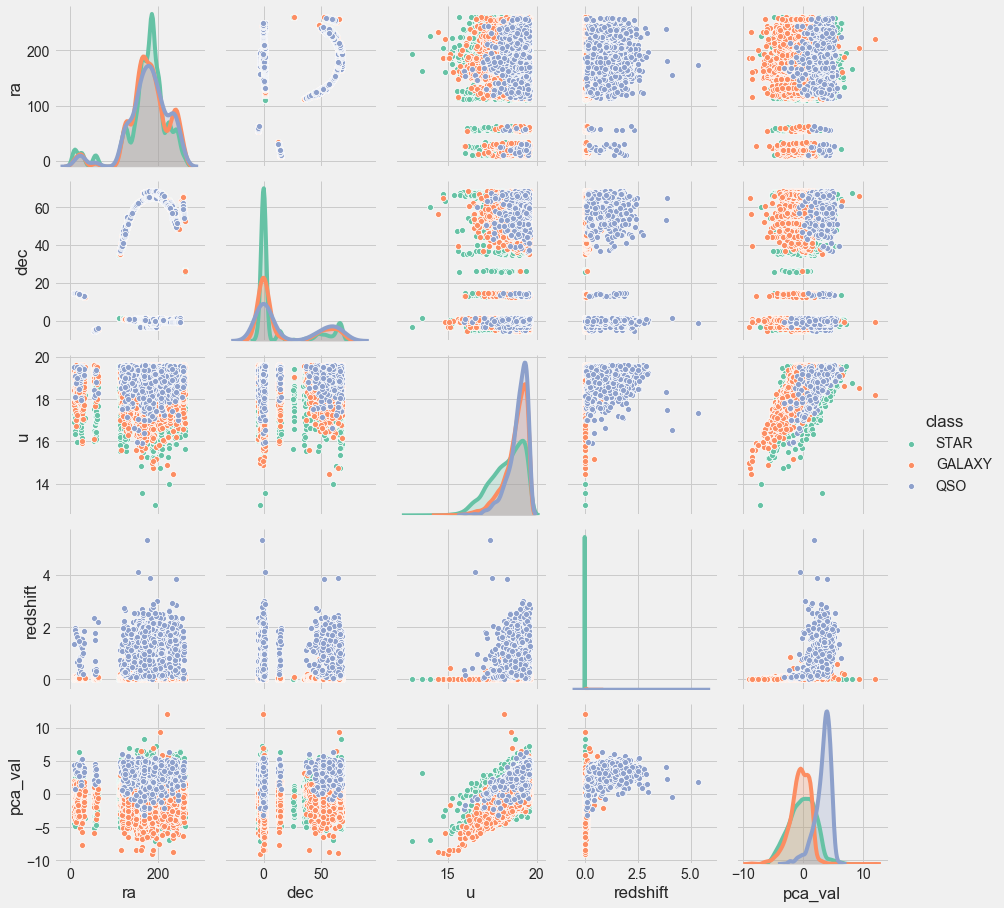

In [38]:
sns.pairplot(df,kind='scatter',hue='class',palette="Set2")

In [39]:
import scipy as sp

In [40]:
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

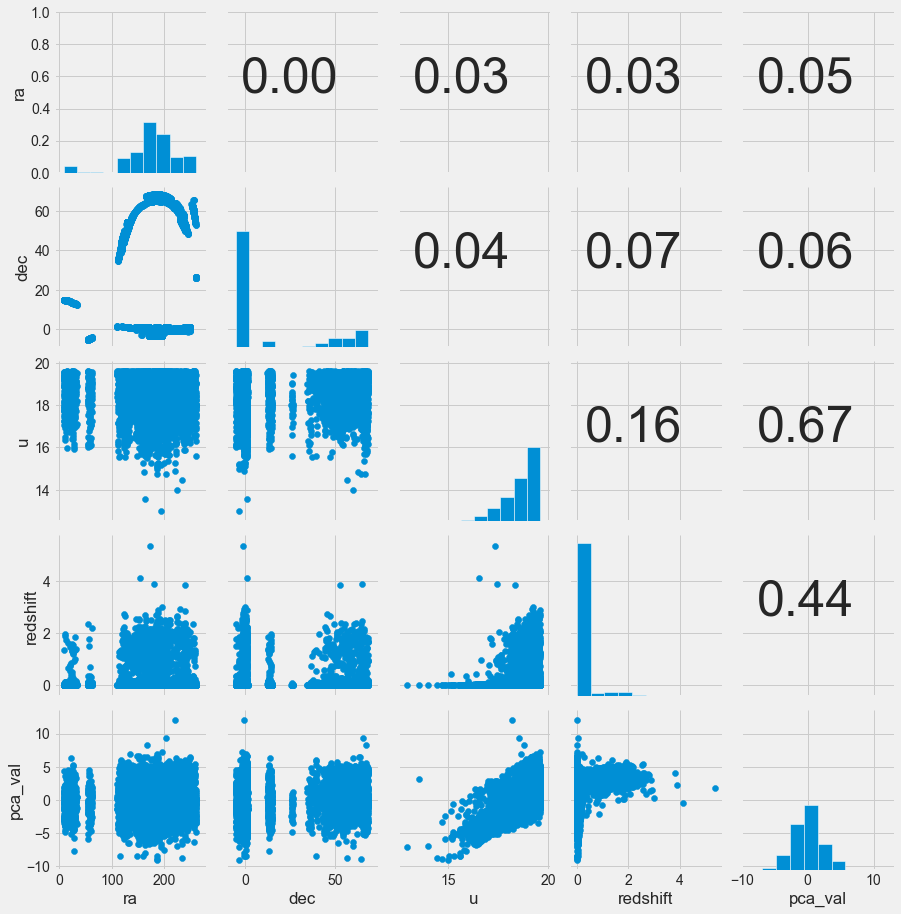

In [41]:
g = sns.PairGrid(df)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

In [15]:
df.corr()

,ra,dec,u,g,r,i,z,redshift
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.030307
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.067021
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000


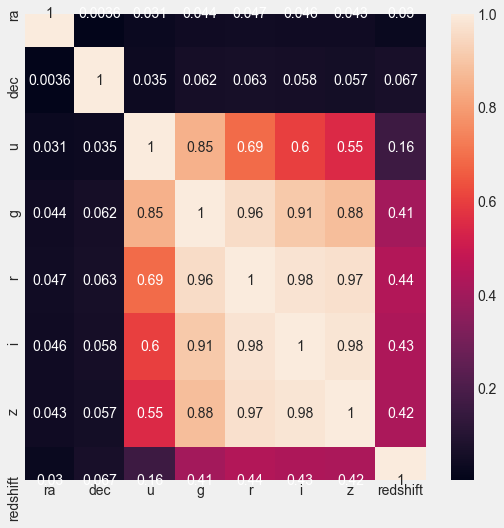

In [18]:
f, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

##### g, r, i, z are highly correlated and PCA could be used for dimensionality reduction.
##### u also shows similar behavior but the correlation drops as one moves from g to z.

### PCA

In [19]:
pca_val = df[['g', 'r', 'i', 'z']]
pca = PCA(n_components=1)
pca_val = pca.fit_transform(pca_val)
pca_val = pca_val.reshape(-1,)

In [20]:
pca_val = pd.Series(pca_val, name='pca_val')
df = pd.concat([df, pca_val], axis=1)
df.drop(['g', 'r', 'i', 'z'], axis=1, inplace=True)

In [22]:
df.head(10)

,ra,dec,u,class,redshift,pca_val
0,183.531326,0.089693,19.47406,STAR,-0.000009,-1.809151
1,183.598371,0.135285,18.66280,STAR,-0.000055,-0.214012
2,183.680207,0.126185,19.38298,GALAXY,0.123111,1.128840
3,183.870529,0.049911,17.76536,STAR,-0.000111,-1.259402
4,183.883288,0.102557,17.55025,STAR,0.000590,-0.570706
5,183.847174,0.173694,19.43133,STAR,0.000315,2.758014
6,183.864379,0.019201,19.38322,GALAXY,0.100242,0.359492
7,183.900081,0.187473,18.97993,STAR,0.000315,1.149432
8,183.924588,0.097246,17.90616,STAR,0.000089,-0.243407
9,183.973498,0.081626,18.67249,GALAXY,0.040508,1.276917


In [23]:
X = df.drop('class', axis=1)
y = df['class']
y.value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

##### split into two trainig sets (dev and test). so I have train, test, dev

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=5)
X_train_feature_imp = X_train
X_train = X_train.values
X_dev = X_dev.values
X_test = X_test.values

In [26]:
print(y_train.value_counts())
print(y_dev.value_counts())
print(y_test.value_counts())

GALAXY    3611
STAR      3000
QSO        614
Name: class, dtype: int64
GALAXY    644
STAR      522
QSO       109
Name: class, dtype: int64
GALAXY    743
STAR      630
QSO       127
Name: class, dtype: int64


All three splits contain an even distribution of data.
The three labels could be encoded into integers using Scikit-Learn's label encoder

In [28]:
le = LabelEncoder()
y = le.fit_transform(y)

### Decision Tree Classifier

Text(0.5, 1.0, 'Performance on Training set and Dev set')

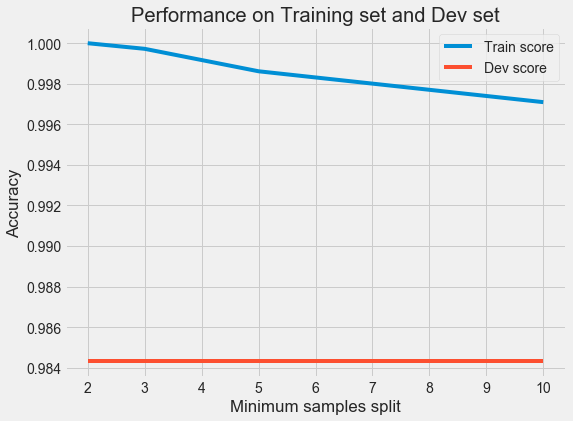

In [29]:
min_samples_split = [2, 3, 5, 10]
accuracy_train = []
accuracy_dev = []
for i in min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split=i, random_state=25, min_samples_leaf=1)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(min_samples_split, accuracy_train, label='Train score')
plt.plot(min_samples_split, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Minimum samples split')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

2 was chosen as the hyperparameter by looking at the performance on the training set as the dev set performance was similar

Text(0.5, 1.0, 'Performance on Training set and Dev set')

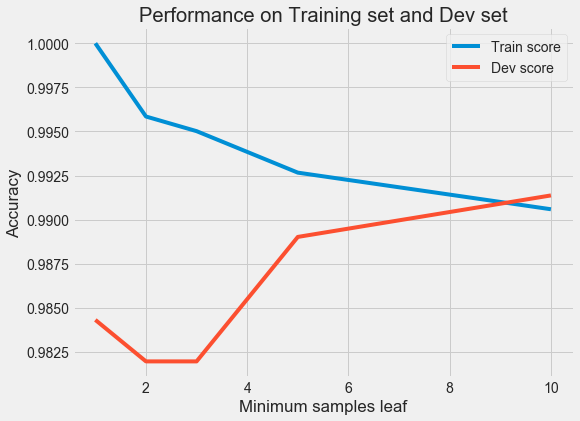

In [30]:
min_samples_leaf = [1, 2, 3, 5, 10]
accuracy_train = []
accuracy_dev = []
for i in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=i, random_state=25)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(min_samples_leaf, accuracy_train, label='Train score')
plt.plot(min_samples_leaf, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Minimum samples leaf')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

9 was chosen for the min_samples_leaf hyperparameter as it showed better performance on the validation set

In [31]:
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9, random_state=25)
clf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, clf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, clf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, clf.predict(X_dev))))

Training set: 
Accuracy: 0.990726643598616
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      3611
         QSO       0.96      0.94      0.95       614
        STAR       1.00      1.00      1.00      3000

    accuracy                           0.99      7225
   macro avg       0.98      0.98      0.98      7225
weighted avg       0.99      0.99      0.99      7225


Dev set: 
Accuracy: 0.9913725490196078
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99       644
         QSO       0.98      0.94      0.96       109
        STAR       1.00      1.00      1.00       522

    accuracy                           0.99      1275
   macro avg       0.99      0.98      0.98      1275
weighted avg       0.99      0.99      0.99      1275



### Random Forest Classifier

Text(0.5, 1.0, 'Performance on Training set and Dev set')

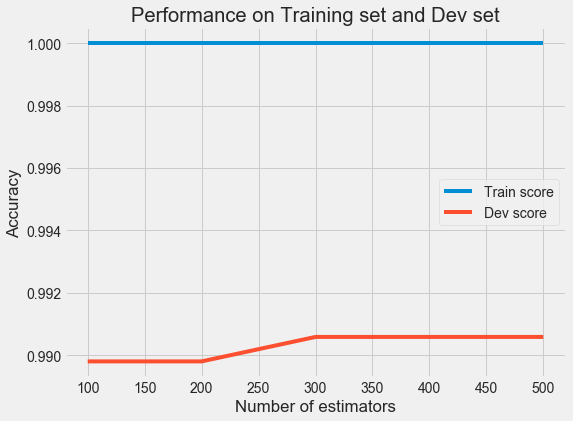

In [32]:
n_estimators = [100, 200, 300, 400, 500]
accuracy_train = []
accuracy_dev = []
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i, random_state=10)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(n_estimators, accuracy_train, label='Train score')
plt.plot(n_estimators, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

Values greater than 300 estimators showed better performance.
300 was chosen as the final value (faster computation).
Other parameters could also be tweaked for better performance on the dev set.

In [33]:
clf = RandomForestClassifier(n_estimators=300, random_state=10)
clf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, clf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, clf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, clf.predict(X_dev))))

Training set: 
Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00      3611
         QSO       1.00      1.00      1.00       614
        STAR       1.00      1.00      1.00      3000

    accuracy                           1.00      7225
   macro avg       1.00      1.00      1.00      7225
weighted avg       1.00      1.00      1.00      7225


Dev set: 
Accuracy: 0.9905882352941177
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       644
         QSO       0.97      0.95      0.96       109
        STAR       0.99      1.00      1.00       522

    accuracy                           0.99      1275
   macro avg       0.99      0.98      0.98      1275
weighted avg       0.99      0.99      0.99      1275



In [34]:
rf_clf = RandomForestClassifier(n_estimators=300, random_state=10)
dt_clf = DecisionTreeClassifier(min_impurity_split=2, min_samples_leaf=9, random_state=25)
e_vclf = VotingClassifier([('rf', rf_clf), ('dt', dt_clf)], voting='soft')

In [35]:
e_vclf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, e_vclf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, e_vclf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, e_vclf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, e_vclf.predict(X_dev))))

Training set: 
Accuracy: 0.9955709342560554
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      1.00      1.00      3611
         QSO       1.00      0.95      0.97       614
        STAR       1.00      1.00      1.00      3000

    accuracy                           1.00      7225
   macro avg       1.00      0.98      0.99      7225
weighted avg       1.00      1.00      1.00      7225


Dev set: 
Accuracy: 0.984313725490196
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98       644
         QSO       0.97      0.88      0.92       109
        STAR       0.99      1.00      1.00       522

    accuracy                           0.98      1275
   macro avg       0.98      0.96      0.97      1275
weighted avg       0.98      0.98      0.98      1275



The classifier created using soft voting showed poorer performance on the dev set than Random Forest and Decision Tree classifiers.
Looking at the classification reports from all the classifiers, Decision Tree classifier was chosen for the final model as it had shown good numbers for precision, recall and the f1 score.

In [36]:
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9, random_state=25)
clf.fit(X_train, y_train)
print('Test set: ')
print('Accuracy: {}'.format(accuracy_score(y_test, clf.predict(X_test))))
print('Classification report:\n{}'.format(classification_report(y_test, clf.predict(X_test))))

Test set: 
Accuracy: 0.9926666666666667
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       743
         QSO       0.95      0.97      0.96       127
        STAR       1.00      1.00      1.00       630

    accuracy                           0.99      1500
   macro avg       0.98      0.99      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [50]:
#import itertools
#from sklearn.metrics import confusion_matrix
#from sklearn import preprocessing
import time
from sklearn.model_selection import cross_val_score

In [53]:
a=[None]*2

In [56]:
t = DecisionTreeClassifier(max_depth=5)

training_start = time.perf_counter()
tfit = t.fit(X_train,y_train)
training_end = time.perf_counter()

total_time = training_end-training_start
print("Training Accuracy:        ",tfit.score(X_train,y_train))
scores = cross_val_score(t,X_train,y_train,cv=5,scoring="accuracy")
print("Cross Validation Accuracy:", scores.mean())   
print("\nTime consumed for training %5.4f" % (total_time))
a[0]=scores.mean()

Training Accuracy:         0.9923875432525952
Cross Validation Accuracy: 0.9883737024221453

Time consumed for training 0.0365


In [58]:
RFC = RandomForestClassifier(n_estimators=10,max_depth=10)

training_start = time.perf_counter()
RFCfit = RFC.fit(X_train,y_train)
training_end = time.perf_counter()

total_time = training_end-training_start
print("Training Accuracy:        ",RFCfit.score(X_train,y_train))
scores = cross_val_score(RFC,X_train,y_train,cv=5,scoring="accuracy")
print("Cross Validation Accuracy:", scores.mean()) 
print("\nTime consumed for training %5.4f" % (total_time))
a[1]=scores.mean()

Training Accuracy:         0.9969550173010381
Cross Validation Accuracy: 0.9875432525951556

Time consumed for training 0.1187


<BarContainer object of 2 artists>

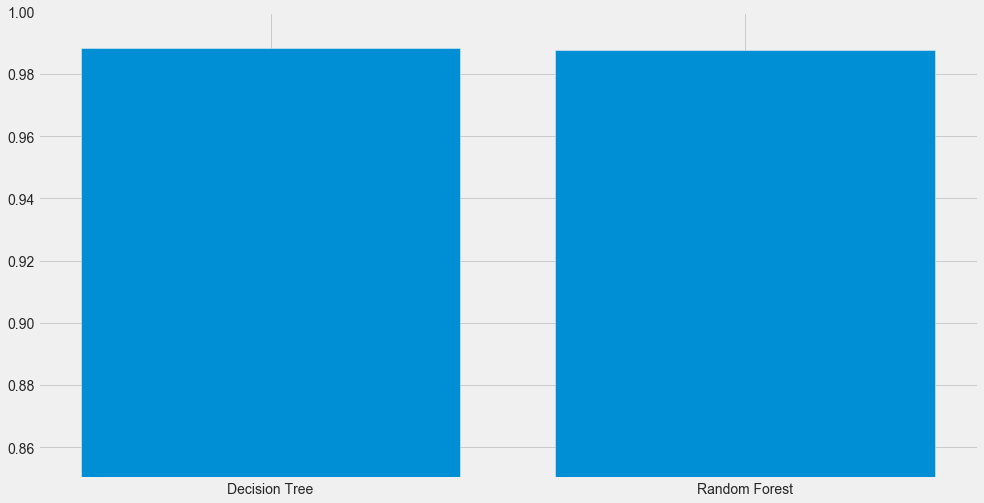

In [61]:
d1 = pd.DataFrame(a)
x=['Decision Tree','Random Forest']

fig,ax = plt.subplots()
fig.set_size_inches(15,8)
bottom, top = ax.set_ylim(0.85, 1)
plt.bar(x,a)

In [62]:
b=[None]*2

In [63]:
prediction_start = time.perf_counter()
tpred = tfit.predict(X_test)
prediction_end = time.perf_counter()

total_testtime = prediction_end-prediction_start
print("Testing accuracy        ",tfit.score(X_test,y_test))
print("\nTime consumed for testing %6.5f" % (total_testtime))
b[1]=tfit.score(X_test,y_test)
tpred

Testing accuracy         0.992

Time consumed for testing 0.00118


array(['GALAXY', 'STAR', 'STAR', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [64]:
prediction_start = time.perf_counter()
RFCpred = RFCfit.predict(X_test)
prediction_end = time.perf_counter()

total_testtime = prediction_end-prediction_start
print("Testing accuracy        ",RFCfit.score(X_test,y_test))
print("\nTime consumed for testing %6.5f" % (total_testtime))

b[1]=RFCfit.score(X_test,y_test)
RFCpred

Testing accuracy         0.992

Time consumed for testing 0.00551


array(['GALAXY', 'STAR', 'STAR', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

Text(0.5, 1.0, 'Feature Importance')

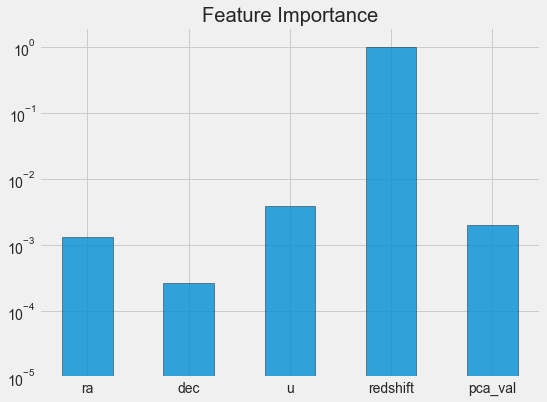

In [37]:
feature_imp = pd.DataFrame({'Feature': X_train_feature_imp.columns,'Importance': clf.feature_importances_})
f = plt.subplots(1, figsize=(8,6))
plt.bar(feature_imp.Feature, feature_imp.Importance, log=True, alpha=0.8, width=0.5, edgecolor='k')
plt.ylim(1e-5, 2)
plt.title('Feature Importance')